# Circular coordinates as a dimension reduction

The low-dimensional coordinate mappings by the circular
coordinate is not only used as a visual representation, but also can
be used as a data representation with reduced dimension so that it
can be further feeded to data analysis frameworks. We first describe
the pipeline for the circular coordinate as a dimension reduction,
and compare it with PCA, in particular, how the topological structure
of the data is preserved under these two dimension reductions. We
will see with an example that linear dimension reduction methods such
as the PCA can break down the topological structure of the data while
the circular coordinate preserves the topological structure.

First, we describe how to use the circular coordinates
as a dimension reduction. In other words, from the data $X$, we use
the circular coordinates to create a data representation $X^{cc}$
with reduced dimension so that $X^{cc}$ can be further feeded to
data analysis frameworks. Given the circular coordinates $\theta_{1},\ldots,\theta_{k}:X=\{X_{1},\ldots,X_{n}\}\to S^{1}$,
we understand $S^{1}\subset\mathbb{R}^{2}$ and create a map $\Theta:X\to\mathbb{R}^{2k}$
as for each $X_{i}\in X$, 
$$
\Theta(X_{i})=(\theta_{1}(X_{i}),\ldots,\theta_{k}(X_{i}))\in\mathbb{R}^{2k}.
$$
Then the data representation $X^{cc}$ with reduced dimension is defined
as $X^{cc}=\{\Theta(X_{1}),\ldots,\Theta(X_{n})\}$, i.e. $X_{i}^{cc}=\Theta(X_{i})$.

Using the circular coordinates as a dimension reduction
has several benefits. First, since the reduced representation of the
data is from the circular coordinates, which is again from the persistent
cohomology, this representation focuses more on the topological structure
of the data and less on how it is geometrically embedded. In particular,
the circular coordinates representation does not depend on rotations
or translations. Second, if we choose the circular coordinates $\theta_{1},\ldots,\theta_{k}$
corresponding to significant topological features, the resulting circular
coordinates representation focuses on these significant topological
features and denoises topological noise in the data structure.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Python_code import examples as eg
import numpy as np
from numpy import *
from matplotlib.backends.backend_pdf import PdfPages
import dionysus

# Dataset and its persistent cohomology
Now, we compare how the topological structure of
the data is preserved under the circular coordinates and the PCA.
To see this, we use the dataset $X\subset\mathbb{R}^{3}$ in the plot,
which is a uniform $180$ samples on a loop that wraps around the
cube $[-1,1]^{3}$.

In [3]:
from mpl_toolkits.mplot3d import Axes3D
m = 15
n = 12 * m

random.seed(0)

X01 = np.zeros((m, 3))
X01[:,0] = 1
X01[:,2] = np.array([uniform(0,1) for x in range(m)])

X02 = np.zeros((m, 3))
X02[:,2] = 1
X02[:,0] = np.array([uniform(0,1) for x in range(m)])

X03 = np.zeros((m, 3))
X03[:,2] = 1
X03[:,1] = np.array([uniform(0,1) for x in range(m)])

X04 = np.zeros((m, 3))
X04[:,1] = 1
X04[:,2] = np.array([uniform(0,1) for x in range(m)])

X05 = np.zeros((m, 3))
X05[:,1] = 1
X05[:,0] = - np.array([uniform(0,1) for x in range(m)])

X06 = np.zeros((m, 3))
X06[:,0] = -1
X06[:,1] = np.array([uniform(0,1) for x in range(m)])

X07 = np.zeros((m, 3))
X07[:,0] = -1
X07[:,2] = - np.array([uniform(0,1) for x in range(m)])

X08 = np.zeros((m, 3))
X08[:,2] = -1
X08[:,0] = - np.array([uniform(0,1) for x in range(m)])

X09 = np.zeros((m, 3))
X09[:,2] = -1
X09[:,1] = - np.array([uniform(0,1) for x in range(m)])

X10 = np.zeros((m, 3))
X10[:,1] = -1
X10[:,2] = - np.array([uniform(0,1) for x in range(m)])

X11 = np.zeros((m, 3))
X11[:,1] = -1
X11[:,0] = np.array([uniform(0,1) for x in range(m)])

X12 = np.zeros((m, 3))
X12[:,0] = 1
X12[:,1] = - np.array([uniform(0,1) for x in range(m)])

X = np.vstack((X01, X02, X03, X04, X05, X06, X07, X08, X09, X10, X11, X12))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


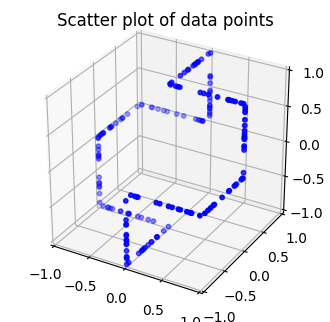

In [4]:
with PdfPages('fig_cc-pca_dataset_scatter.pdf') as pdf:
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', 'datalim')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2], s=10, c = 'b')
    plt.title('Scatter plot of data points')
    pdf.savefig(fig)

The persistent cohomology of $X$ is in the plot. As expected from the dataset, the $1$-dimensional persistent cohomology
of $X$ has one prominent topological feature.

In [5]:
prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
vr = dionysus.fill_rips(X, 2, 4.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using␣ the designated coefficient field and complex.

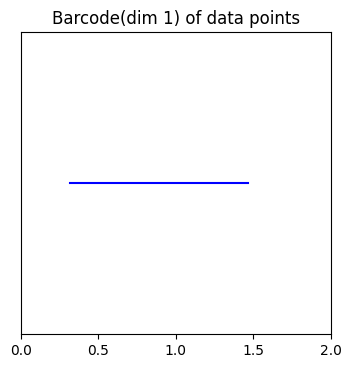

In [6]:
with PdfPages('fig_cc-pca_dataset_ph.pdf') as pdf:
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.xlim([0, 2])
    plt.yticks([])
    plt.title('Barcode(dim 1) of data points')
    dionysus.plot.plot_bars(dgms[1], show=True)
    #dionysus.plot.plot_diagram(dgms[1], show=True)
    #dionysus.plot.plot_diagram(dgms[0], show=True)
    #Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.
    pdf.savefig(fig)

# Computing circular coordinates
Then, we compute the circular coordinates from the longest cohomological feature in the persistent
cohomology.

In [7]:
threshold = 0.5
bars = [bar for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=0.5
cocycles = [cp.cocycle(bar.data) for bar in bars]
#chosen_cocycle= cocycles[0]
#chosen_bar= bars[0]

[0.3177359700202942, 1.4639467000961304]


Text(0.5, 1.0, 'Selected cocycles on bar codes (red bars)')

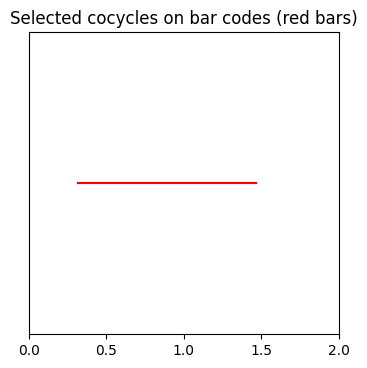

In [8]:
#Red highlight cocyles that persist more than threshold value on barcode, when more than one cocyles have persisted over threshold values, this plots the first one.
fig = plt.figure(figsize=(4,4), dpi=100)
plt.xlim([0, 2])
plt.yticks([])
dionysus.plot.plot_bars(dgms[1], show=False)
Lt1 = [[bar.birth,bar.death] for bar in dgms[1] if bar.death-bar.birth > threshold]
Lt1_tmp = [[bar.birth,bar.death] for bar in dgms[1] if bar.death-bar.birth > 0]
for Lt in Lt1:
    #print(Lt3)
    loc=0
    target=Lt
    for g in range(len(Lt1_tmp)):
        #print(Lt1_tmp[2*g],Lt1_tmp[2*g+1])
        #print([target[0],target[1]])
        #print(Lt1_tmp[2*g][0],target[0])
        #print(Lt1_tmp[g])
        if Lt1_tmp[g][0] == target[0] and Lt1_tmp[g][1] == target[1]:
            loc=g
            #print(g)
    #Searching correct term
    plt.plot([Lt[0],Lt[1]],[loc,loc],'r-')
    print(Lt)
    #plt.plot([[bar.birth,bar.death],'r')
#print(Lt1)
plt.title('Selected cocycles on bar codes (red bars)')
#plt.show()
#pdf.savefig(fig)


In [9]:
#vr_8 = dionysus.Filtration([s for s in vr if s.data <= max([bar.birth for bar in bars])])
#coords = dionysus.smooth(vr_8, chosen_cocycle, prime)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2], c = coords)

In [10]:
import tensorflow as tf
overall_coords = np.zeros(X.shape[0], dtype = float)
from Python_code import utils
lp=1
lq=2
toll = 1e-4#tolerance for constant edges.
color = np.zeros((X.shape[0], 3 * len(cocycles)), dtype = float)
alphas = [0,0.5,1]
colIdx = 0
for alpha in alphas:
#	fig = plt.figure(figsize=(4,4), dpi=100)
#	plt.text(0.3,0.5,'Analysis of Circular coordinates \n (mod {} - {}*L{} + {}*L{})'.format(prime,1-alpha,lp,alpha,lq),transform=plt.gca().transAxes)
#	pdf.savefig(fig)
	for g in range(len(cocycles)):
		chosen_cocycle = cocycles[g]
		chosen_bar = bars[g]
		vr_L2 = dionysus.Filtration([s for s in vr if s.data <= max([bar.birth for bar in bars])])
		coords = dionysus.smooth(vr_L2, chosen_cocycle, prime)
		l2_cocycle,f,bdry = utils.optimizer_inputs(vr, bars, chosen_cocycle, coords, prime)
		l2_cocycle = l2_cocycle.reshape(-1, 1)
		##It does not seem to work to have double invokes here...
		B_mat = bdry.todense()
		z = tf.Variable(l2_cocycle, trainable=True)
		#L1 in tensorflow language
		#cost_z = tf.reduce_sum( tf.abs(f - tf.matmul(B_mat,z) ) )
		#L2 in tensorflow language
		#cost_z = tf.reduce_sum( tf.pow( tf.abs(f - tf.matmul(B_mat,z) ), 2 ) )
		#Lp+alpha*Lq norm in tensorflow language
		#2020-02-07: I am not sure why @ operator is no longer a valid syntax, but I replace them with tf.matmul.
		#lp=1
		#lq=2
		#for alpha in [0,0.5,1]:
		cost_z = (1-alpha)*tf.pow( tf.reduce_sum( tf.pow( tf.abs(f - tf.matmul(B_mat,z) ),lp ) ), 1/lp) + alpha* tf.pow( tf.reduce_sum( tf.pow( tf.abs(f - tf.matmul(B_mat,z) ),lq ) ), 1/lq)
		#Gradient Descedent Optimizer
		#opt_gd = tf.train.GradientDescentOptimizer(0.1).minimize(cost_z)
		#Adams Optimizer
		opt_adams = tf.train.AdamOptimizer(1e-4).minimize(cost_z)
		#The latter is much better in terms of result
		with tf.Session() as sess:
			sess.run(tf.global_variables_initializer())
			for i in range(1000):#How many iterations you want to run?
				sess.run(opt_adams)
			res_tf=sess.run([z,cost_z])
		#type(res_tf)
		res_tf=res_tf[0]
		overall_coords=overall_coords+res_tf.T[0,:]
		color[:, colIdx] = np.mod(res_tf.T[0,:],1)
#		color_filenam = 'color_coordinates_'+filenam+'_'+str(alpha)+'_'+str(g)+'.txt'
#		np.savetxt(color_filenam,color)
		colIdx = colIdx + 1

/home/jiskim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jiskim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jiskim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jiskim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:496: 

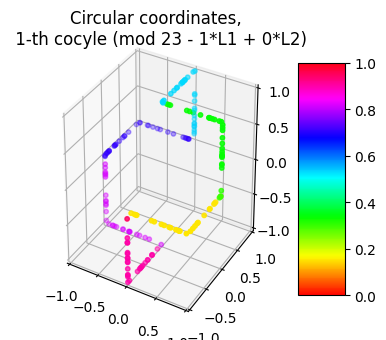

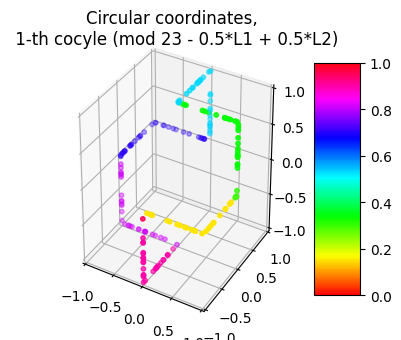

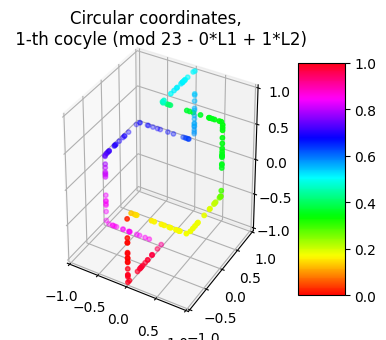

In [11]:
colIdx = 0
for alpha in alphas:
	for g in range(len(cocycles)):
		fig = plt.figure(figsize=(4,4), dpi=100)
		ax = fig.add_subplot(111, projection='3d')	
		ax.set_xlim([-1,1])
		ax.set_ylim([-1,1])
		ax.set_zlim([-1,1])
		surf = ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2], s=10, c = color[:, colIdx], cmap="hsv",zorder=10, vmin = 0, vmax = 1)
		fig.colorbar(surf, shrink=1, aspect=5)
		#plt.scatter(dataset.T[0,:],dataset.T[1,:],s=10, c=color, cmap="hsv",zorder=10)
		##scatter(*annulus.T, c= color, cmap="hsv")
		#plt.clim(0,1)
		#plt.colorbar()
		#plt.axis('equal')
		plt.title('Circular coordinates, \n {}-th cocyle (mod {} - {}*L{} + {}*L{})'.format(g+1,prime,1-alpha,lp,alpha,lq))
		#plt.show()
		#toll = 1e-3
		colIdx = colIdx + 1

# Circular coordinates representation and its persistent cohomology
For the circular coordinates representation, we let
$\theta:X\to S^{1}\subset\mathbb{R}^{2}$ to be the circular coordinate
from the prominent cobundary of the persistent cohomology in the previous plot,
and create a map $\Theta:X\to\mathbb{R}^{2}$ by this single circular
coordinate, i.e. $\Theta(X_{i})=\theta(X_{i})$. The resulting circular
coordinates representation $X^{cc}=\{\Theta(X_{1}),\ldots,\Theta(X_{n})\}$
is in the plot.

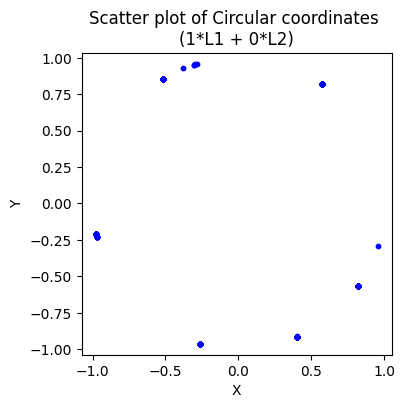

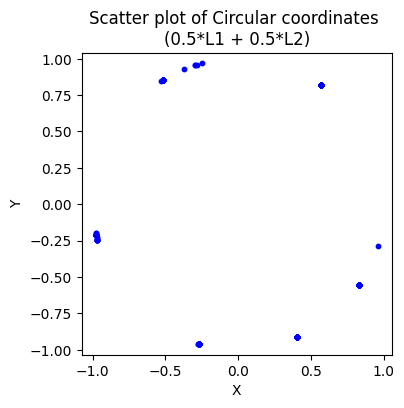

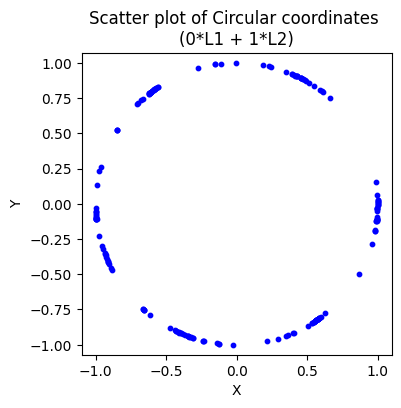

In [12]:
X_cc = numpy.zeros((X.shape[0], 2, len(alphas)*len(cocycles)), dtype = float)
colIdx = 0
for colIdx in range(color.shape[1]):
    X_cc[:, 0, colIdx] = cos(2 * pi * color[:, colIdx])
    X_cc[:, 1, colIdx] = sin(2 * pi * color[:, colIdx])

with PdfPages('fig_cc-pca_cc_scatter.pdf') as pdf:    
    colIdx = 0
    for alpha in alphas:
        for g in range(len(cocycles)):  
            fig = plt.figure(figsize=(4,4), dpi=100)
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.gca().set_aspect('equal', 'datalim')
            plt.scatter(X_cc[:, 0, colIdx], X_cc[:, 1, colIdx], s=10, c='b')
            plt.axis('equal')
            plt.title('Scatter plot of Circular coordinates \n({}*L{} + {}*L{})'.format(1-alpha,lp,alpha,lq))
            colIdx = colIdx + 1
            pdf.savefig(fig)

And the persistent cohomology of $X^{cc}$ is in the plot. As you can see, the 1-dimensional persistent cohomology of $X^{cc}$
in the plot contains one topological feature, which is the same with
the 1-dimensional persistent cohomology of the original data $X$.
Hence the topological structure of the original data is
preserved.

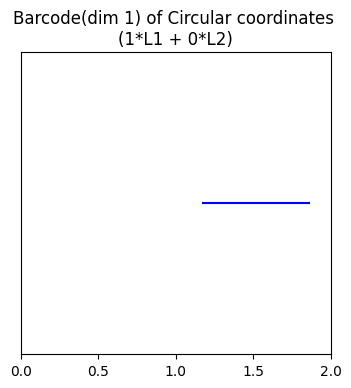

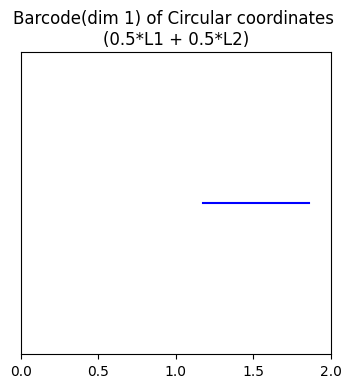

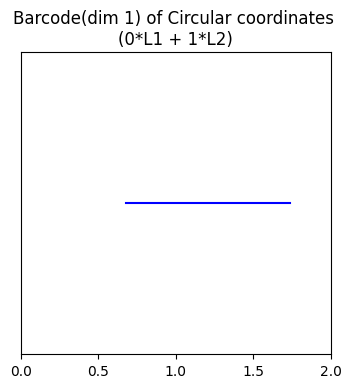

In [13]:
with PdfPages('fig_cc-pca_cc_ph.pdf') as pdf:
    prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
    colIdx = 0
    for alpha in alphas:
        for g in range(len(cocycles)):
            vr_cc = dionysus.fill_rips(X_cc[:,:,colIdx], 2, 4.) #Vietoris-Rips complex
            cp_cc = dionysus.cohomology_persistence(vr_cc, prime, True) #Create the persistent cohomology based on the chosen parameters.
            dgms_cc = dionysus.init_diagrams(cp_cc, vr_cc) #Calculate the persistent diagram using␣ the designated coefficient field and complex.
            fig = plt.figure(figsize=(4,4), dpi=100)
            plt.xlim([0, 2])
            plt.yticks([])
            plt.title('Barcode(dim 1) of Circular coordinates \n({}*L{} + {}*L{})'.format(1-alpha,lp,alpha,lq))
            dionysus.plot.plot_bars(dgms_cc[1], show=True)
            #dionysus.plot.plot_diagram(dgms_cc[1], show=True)
            #dionysus.plot.plot_diagram(dgms[0], show=True)
            #Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.
            colIdx = colIdx + 1
            pdf.savefig(fig)

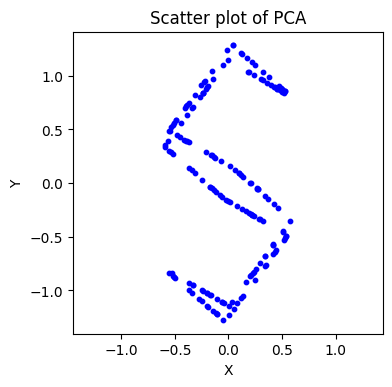

In [14]:
from Python_code import PCAtool as PCAtool
X_pca = PCAtool.pca(X, K=2)

with PdfPages('fig_cc-pca_pca_scatter.pdf') as pdf:
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', 'datalim')
    scatter(X_pca[:, 0], X_pca[:, 1], s=10, c='b')
    plt.axis('equal')
    plt.title('Scatter plot of PCA')
    pdf.savefig(fig)

For the PCA representation, to be comparable with
the circular coordinates, we choose the projection dimension to be
$2$. The resulting PCA representation $X^{pca}$ is in the plot. From
the plot, we can see that the $1$-dimensional cohomological structure
of the original data $X$ is collapsed in $X^{pca}$. And the persistent
cohomology of $X^{pca}$ is in the plot. As you can see, the 1-dimensional
persistent cohomology of $X^{pca}$ in the plot contains $3$ topological features,
which is different from the 1-dimensional persistent cohomology of
the original data $X$. Hence the topological structure
of the original data is not preserved.

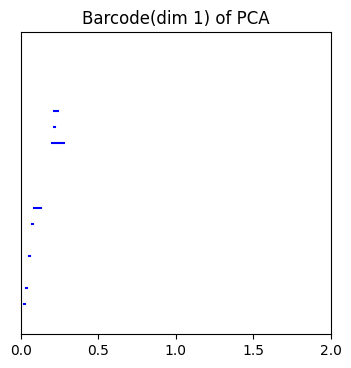

In [15]:
with PdfPages('fig_cc-pca_pca_ph.pdf') as pdf:
    prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
    vr_pca = dionysus.fill_rips(X_pca, 2, 4.) #Vietoris-Rips complex
    cp_pca = dionysus.cohomology_persistence(vr_pca, prime, True) #Create the persistent cohomology based on the chosen parameters.
    dgms_pca = dionysus.init_diagrams(cp_pca, vr_pca) #Calculate the persistent diagram using␣ the designated coefficient field and complex.
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.xlim([0, 2])
    plt.yticks([])
    plt.title('Barcode(dim 1) of PCA')
    dionysus.plot.plot_bars(dgms_pca[1], show=True)
    #dionysus.plot.plot_diagram(dgms_pca[1], show=True)
    #dionysus.plot.plot_diagram(dgms[0], show=True)
    #Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.
    pdf.savefig(fig)